# Libraries

In [354]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re
import joblib

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, classification_report, confusion_matrix
)

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier

# XGBoost & LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [330]:
#  Plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Data

## Loading

In [331]:
# Data Loading

df = pd.read_csv('../data/working_data/hsls_09/features_file_hsls09.csv')

display(df.head())
display(df.info())
display(df.describe())



,STU_ID,P1TYPEPS,P1HIDEG2,S2TYPEPS2013,S3REPUTATION,X1PAR2EDU,X3TCREDAPIB,X1MOMEDU,X2PAR2EDU,X3TCREDAPMTH,...,S1PSAT,X1TXMPROF5,S2DEGREE2013,X1TXMPROF3,S2IMPACTIVITY,S2SUREBA,M1INVOLVEMNT,X3TCREDHON,X1TXMQUINT,undermatched
0,10002,3,2,3,1,2,0.0,3,2,0.0,...,1,0.0512,3,0.1768,2,2,2,0.0,2,1
1,10004,3,-7,-8,-8,-7,6.5,0,4,0.0,...,1,0.0531,-8,0.2459,-8,-8,-9,10.5,3,0
2,10010,4,2,3,-7,2,3.0,3,3,0.0,...,1,0.1865,4,0.9806,3,1,2,0.0,5,0
3,10012,3,7,3,1,7,2.0,7,7,1.0,...,1,0.3473,3,0.9961,1,1,1,0.0,5,0
4,10015,3,4,3,1,4,4.0,4,5,1.0,...,1,0.0622,3,0.5260,2,2,1,16.0,4,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 84 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STU_ID            2045 non-null   int64  
 1   P1TYPEPS          2045 non-null   int64  
 2   P1HIDEG2          2045 non-null   int64  
 3   S2TYPEPS2013      2045 non-null   int64  
 4   S3REPUTATION      2045 non-null   int64  
 5   X1PAR2EDU         2045 non-null   int64  
 6   X3TCREDAPIB       2045 non-null   float64
 7   X1MOMEDU          2045 non-null   int64  
 8   X2PAR2EDU         2045 non-null   int64  
 9   X3TCREDAPMTH      2045 non-null   float64
 10  X1DADEDU          2045 non-null   int64  
 11  P1HIDEG1          2045 non-null   int64  
 12  X3TAGPAWGT        2045 non-null   float64
 13  X1PAR1EDU         2045 non-null   int64  
 14  S2FR4Y            2045 non-null   int64  
 15  X1SESQ5           2045 non-null   int64  
 16  X1SESQ5_U         2045 non-null   int64  


None

,STU_ID,P1TYPEPS,P1HIDEG2,S2TYPEPS2013,S3REPUTATION,X1PAR2EDU,X3TCREDAPIB,X1MOMEDU,X2PAR2EDU,X3TCREDAPMTH,...,S1PSAT,X1TXMPROF5,S2DEGREE2013,X1TXMPROF3,S2IMPACTIVITY,S2SUREBA,M1INVOLVEMNT,X3TCREDHON,X1TXMQUINT,undermatched
count,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,...,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,22412.851345,0.952078,0.970171,2.194621,-0.160391,1.096333,3.733741,1.802934,2.390709,0.703667,...,0.524694,-0.298324,2.295844,0.235318,1.093399,0.711980,-1.150611,4.851589,3.659658,0.174083
std,7214.474504,4.321775,5.196490,2.804154,3.197004,5.104103,3.445002,4.414417,4.604772,0.807536,...,2.809684,2.077530,2.902527,2.220893,2.162793,2.191801,4.926744,4.952722,3.223349,0.379274
min,10002.000000,-9.000000,-9.000000,-9.000000,-9.000000,-8.000000,0.000000,-8.000000,-8.000000,0.000000,...,-9.000000,-8.000000,-9.000000,-8.000000,-9.000000,-9.000000,-9.000000,0.000000,-8.000000,0.000000
25%,16227.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,...,1.000000,0.066400,3.000000,0.616300,1.000000,1.000000,-8.000000,0.000000,4.000000,0.000000
50%,22285.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,4.000000,1.000000,...,1.000000,0.135600,3.000000,0.955000,2.000000,1.000000,1.000000,4.000000,5.000000,0.000000
75%,28558.000000,3.000000,4.000000,3.000000,1.000000,4.000000,6.000000,4.000000,5.000000,1.000000,...,1.000000,0.323100,3.000000,0.995300,2.000000,1.000000,3.000000,8.000000,5.000000,0.000000
max,35200.000000,4.000000,7.000000,4.000000,4.000000,7.000000,13.000000,7.000000,7.000000,3.000000,...,3.000000,0.979600,4.000000,1.000000,3.000000,4.000000,4.000000,19.000000,5.000000,1.000000


## Preprocessing

In [332]:
# Data Preprocessing

# drop stu_id
df.drop(columns=['STU_ID'], inplace=True)

## Target Variable

In [333]:
# Target variable - 'undermatched'

target_column = 'undermatched'
y = df[target_column]

X = df.drop(columns=[target_column])

# show the distribution of the target variable in terms of percentage
y_distribution = y.value_counts(normalize=True) * 100
print("Target Variable Distribution:")
print(y_distribution)

Target Variable Distribution:
0    82.591687
1    17.408313
Name: undermatched, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


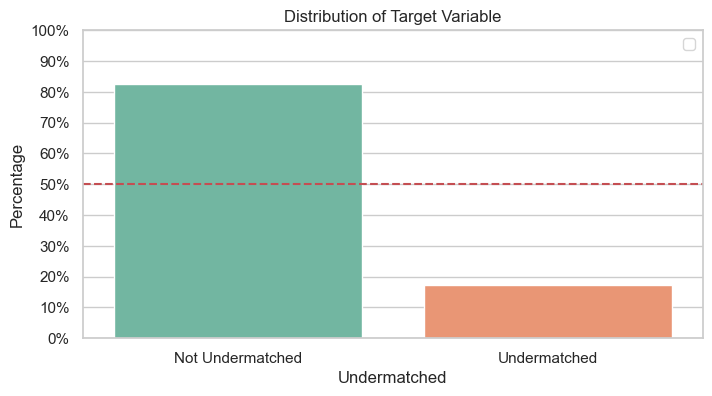

In [334]:
# show the distribution of the target variable in a bar plot in terms of percentage
plt.figure(figsize=(8, 4))
sns.barplot(x=y_distribution.index, y=y_distribution.values, palette='Set2')
plt.title('Distribution of Target Variable')
plt.xlabel('Undermatched')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Not Undermatched', 'Undermatched'])
plt.yticks(ticks=np.arange(0, 101, 10), labels=[f'{i}%' for i in range(0, 101, 10)])
plt.ylim(0, 100)
plt.axhline(y=50, color='r', linestyle='--')
plt.legend()
plt.show()

## Feature Analysis

### Feature Importance

In [335]:
# Top Features - Decision-Tree based analysis

feature_selector = ExtraTreesClassifier(random_state=42)
feature_selector.fit(X, y)
importances = feature_selector.feature_importances_

# Feature Importance DataFrame
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Sort by importance 
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
display(feature_importance_df.head(10))  # Show top features

,feature,importance
51,A2HIGHERED,0.018947
23,X3THILANG,0.016915
19,X3TCREDGEN,0.016821
18,X3THIMATH,0.016474
3,S3REPUTATION,0.016472
27,S2FR2YPUB,0.015860
5,X3TCREDAPIB,0.015820
46,S3FOCUS,0.015628
80,X3TCREDHON,0.015596
59,X1PAR2OCC2,0.015507


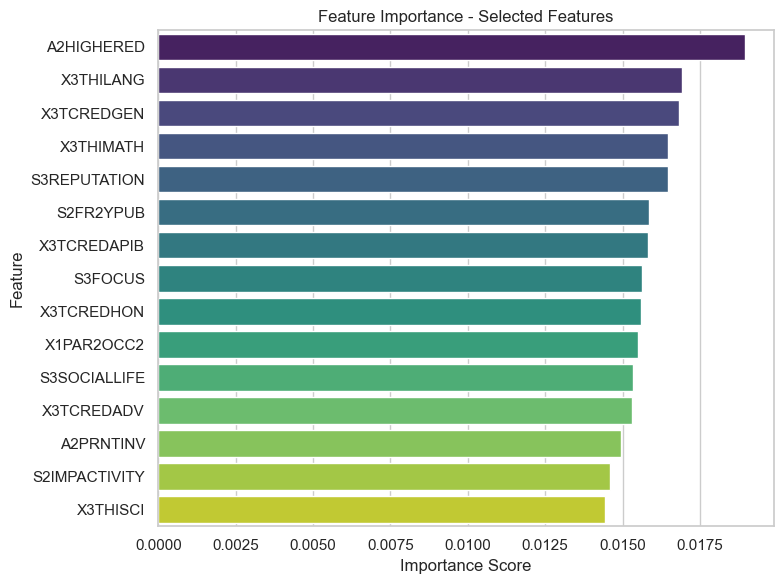

Final Selected Features in X_selected: ['A2HIGHERED', 'X3THILANG', 'X3TCREDGEN', 'X3THIMATH', 'S3REPUTATION', 'S2FR2YPUB', 'X3TCREDAPIB', 'S3FOCUS', 'X3TCREDHON', 'X1PAR2OCC2', 'S3SOCIALLIFE', 'X3TCREDADV', 'A2PRNTINV', 'S2IMPACTIVITY', 'X3THISCI']


In [336]:
# Select the top N features
top_n = 15
top_features = feature_importance_df.head(top_n)['feature'].values.tolist()

# Keep only features that exist in X
top_features = [f for f in top_features if f in X.columns]

# Final X selection
X_selected = X[top_features]

# Filter feature importance dataframe to match X_selected
final_feature_importance_df = feature_importance_df[feature_importance_df['feature'].isin(top_features)].copy()

# Sort for better visualization
final_feature_importance_df = final_feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=final_feature_importance_df, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Selected Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print final selected features
print("Final Selected Features in X_selected:", top_features)

### Top Features Data Dictionary

In [ ]:
# Define file path (relative to your GitHub structure)
file_path = "../data/raw_data/hsls_09/RecordFileLayout_HSLS_17_PETS_SR_STUDENT.txt"

# Read the file
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# List to store extracted variables and definitions
variable_data = []

# Regex pattern for extracting variable name and description
pattern = re.compile(r"^([A-Z0-9_]+)\s+\d+-\d+\s+(.+)$")

for line in lines:
    line = line.strip()

    # Match variable name and definition
    match = pattern.match(line)
    if match:
        variable_name = match.group(1)  # Extract variable name
        description = match.group(2)    # Extract description
        variable_data.append([variable_name, description])

# Convert to DataFrame
df_variables = pd.DataFrame(variable_data, columns=["Variable", "Definition"])

# Display the first few rows
print(df_variables.head())


   Variable                                       Definition
0    STU_ID                                       Student ID
1    SCH_ID                                        School ID
2  X1NCESID  X1 School identification number from CCD or PSS
3  X2NCESID  X2 School identification number from CCD or PSS
4  STRAT_ID                                          Stratum


In [338]:
# join the variable definitions with the feature importance dataframe
feature_importance_df = feature_importance_df.merge(
    df_variables,
    left_on='feature',
    right_on='Variable',
    how='left'
)
# Drop the 'Variable' column as it's redundant now
feature_importance_df.drop(columns=['Variable'], inplace=True)
#feature_importance_df

### Correlation Matrix

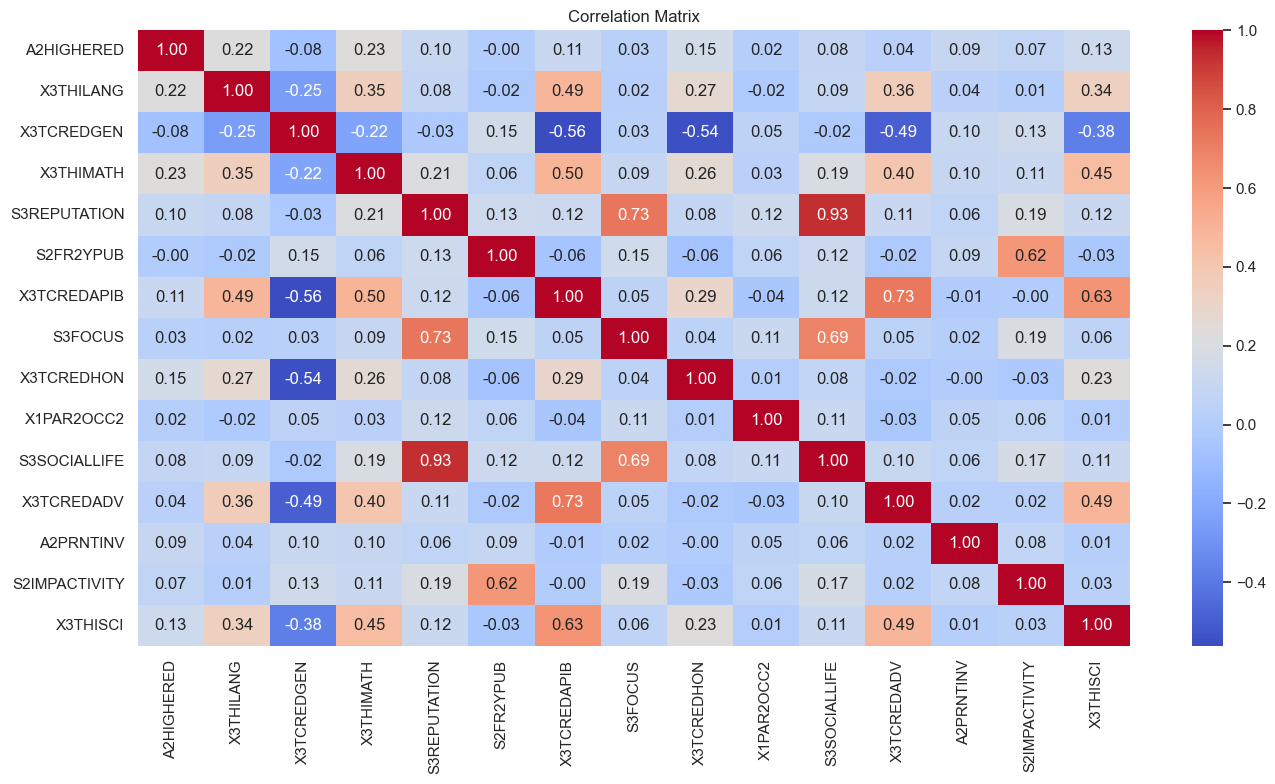

In [339]:
# Correlation Matrix

corr = X_selected.corr()  
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [340]:
df_chart = df.copy()  # Create a copy of df for this stage

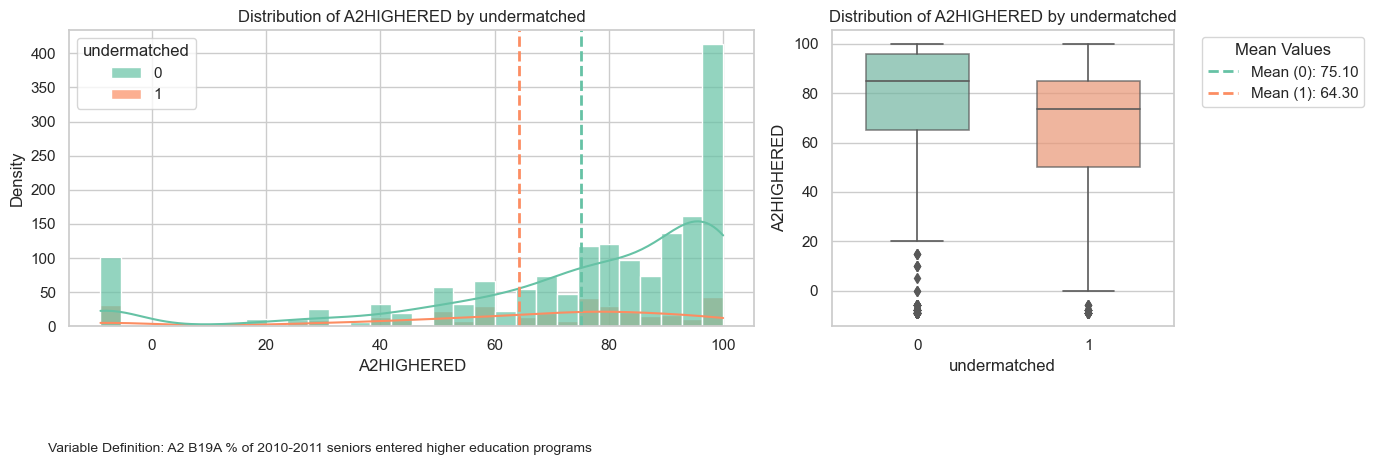

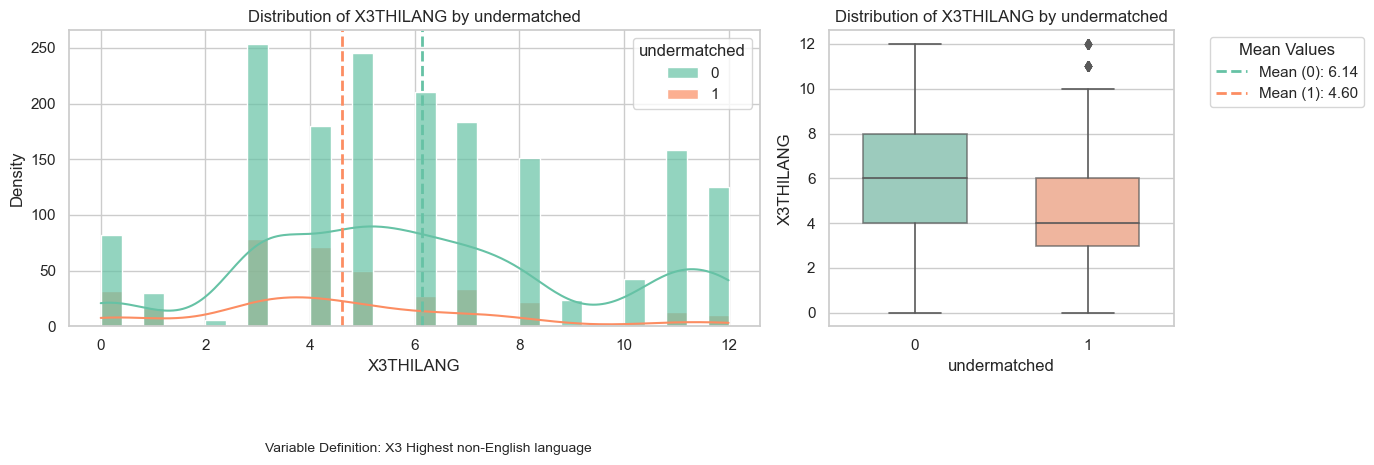

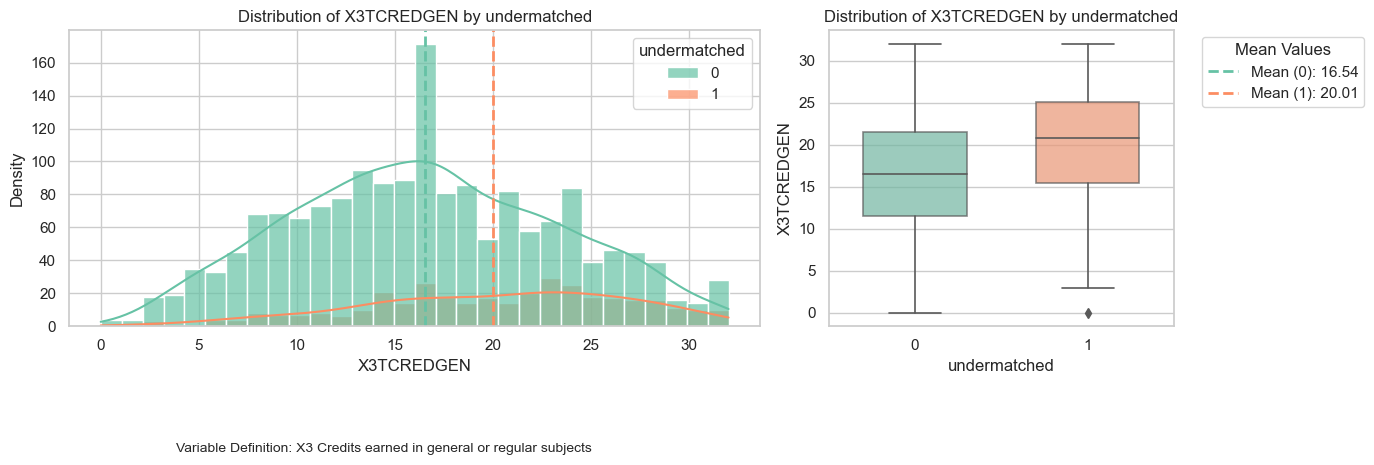

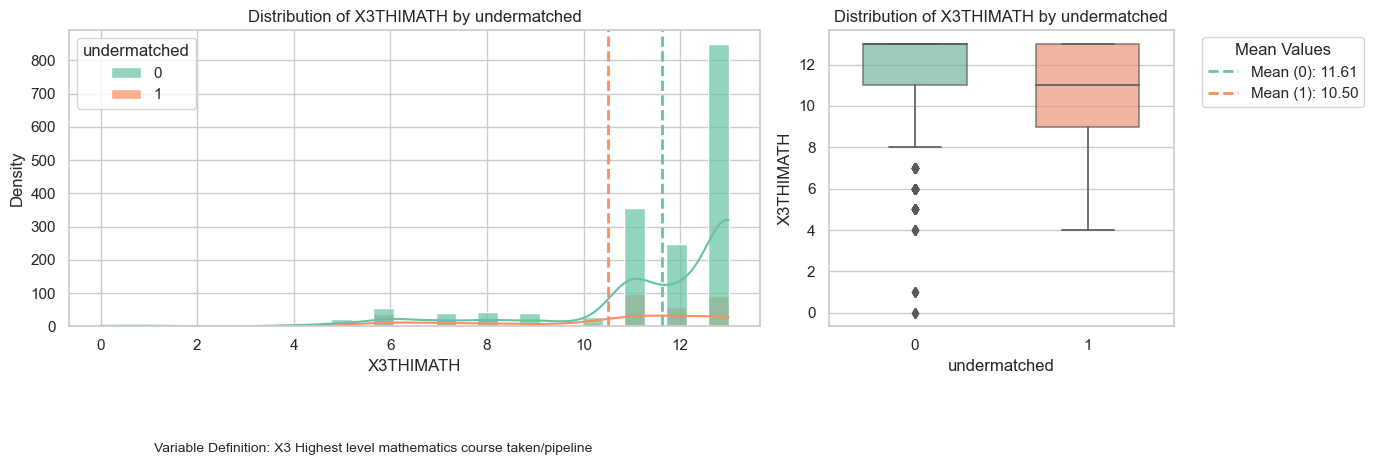

<Figure size 800x400 with 0 Axes>

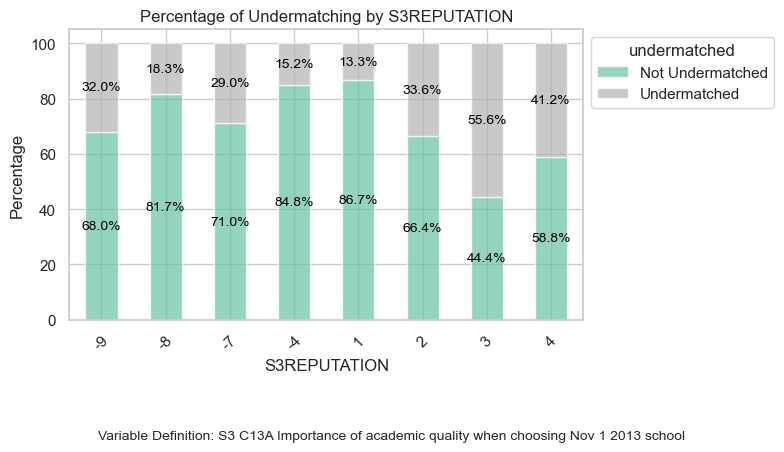

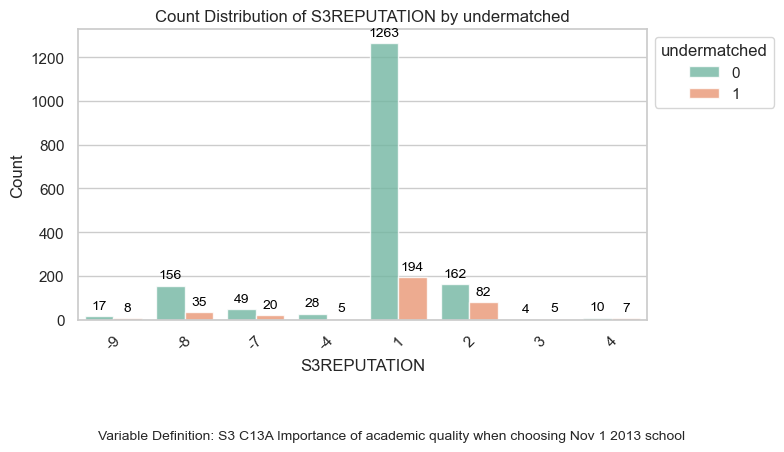

<Figure size 800x400 with 0 Axes>

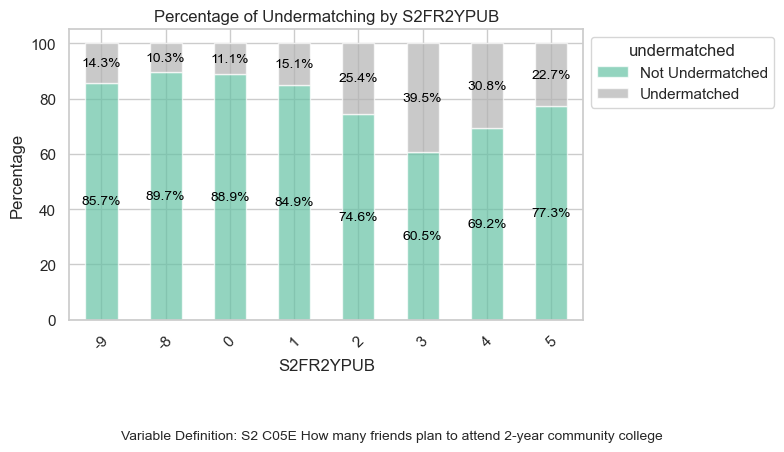

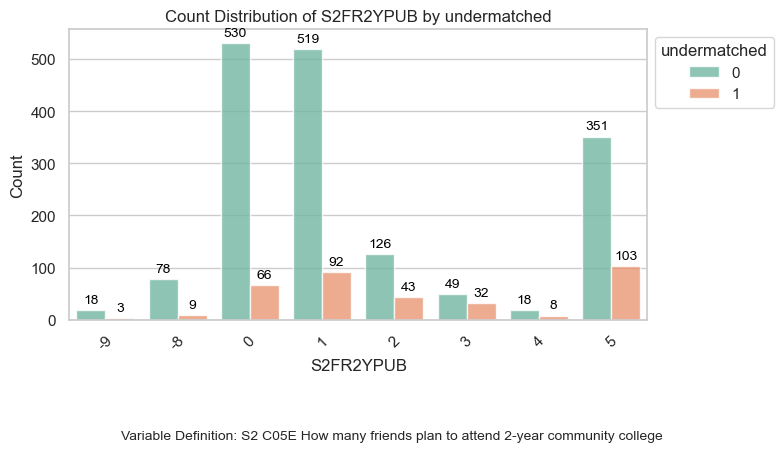

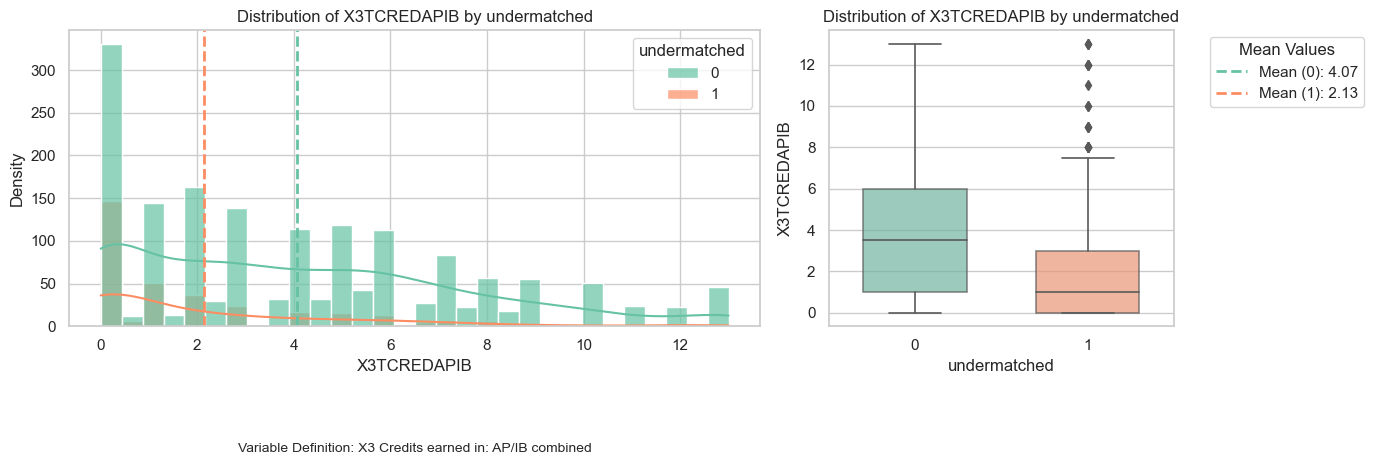

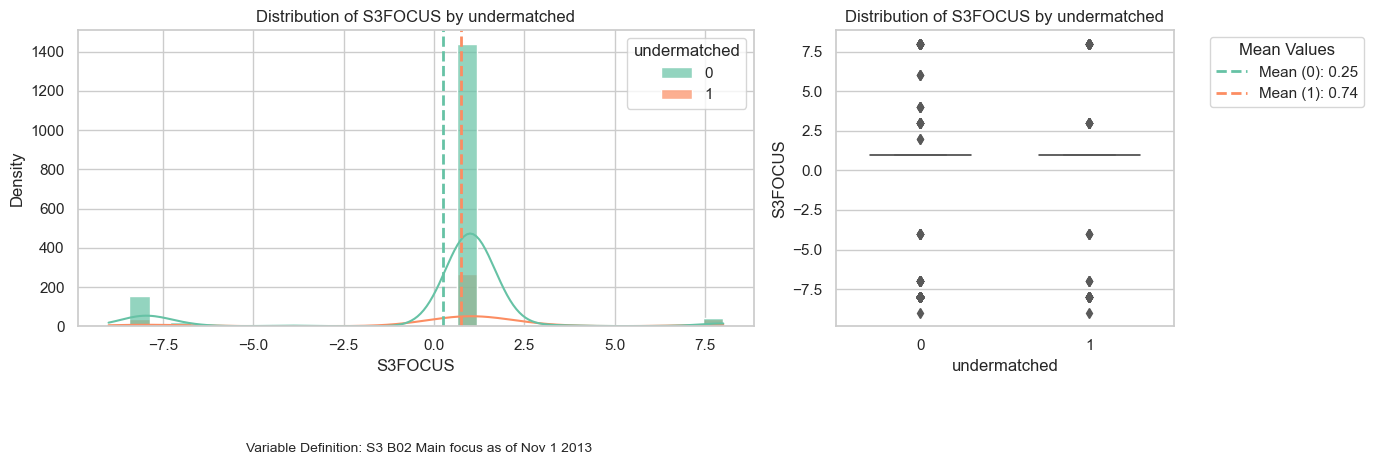

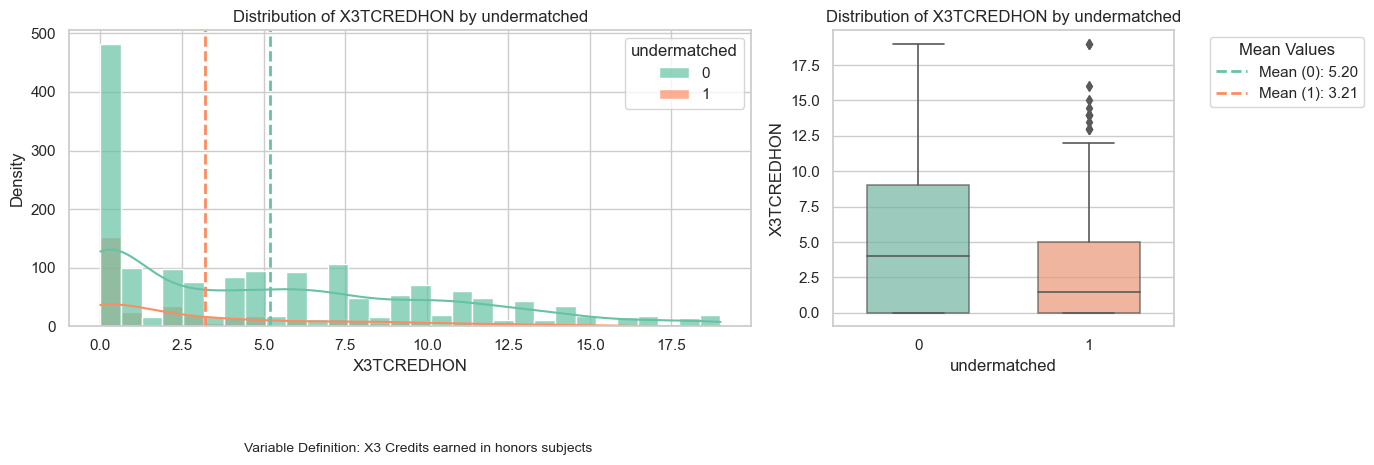

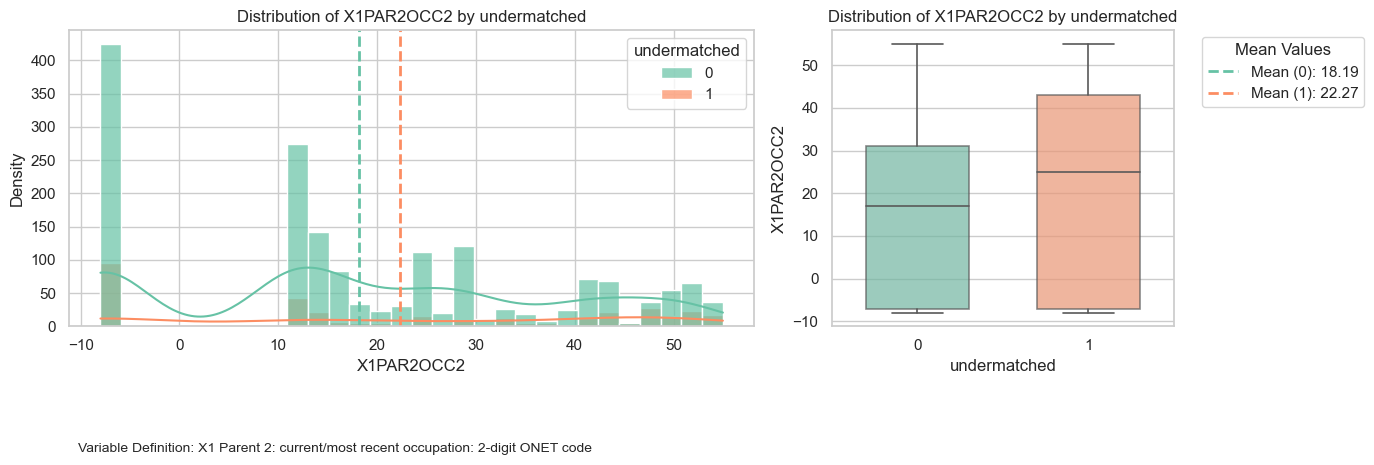

<Figure size 800x400 with 0 Axes>

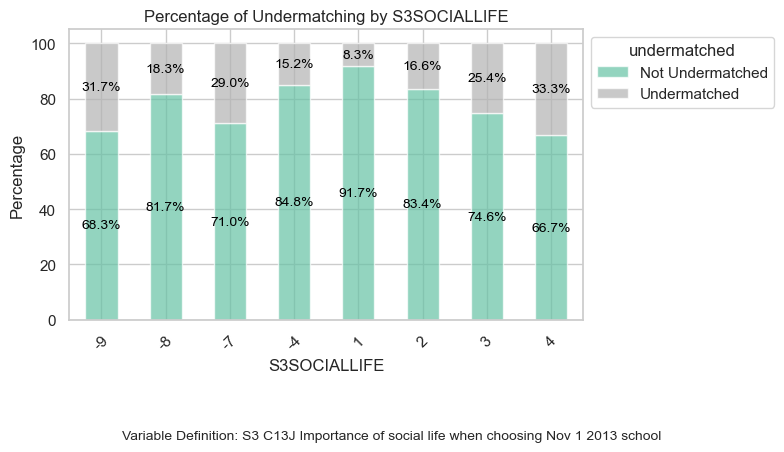

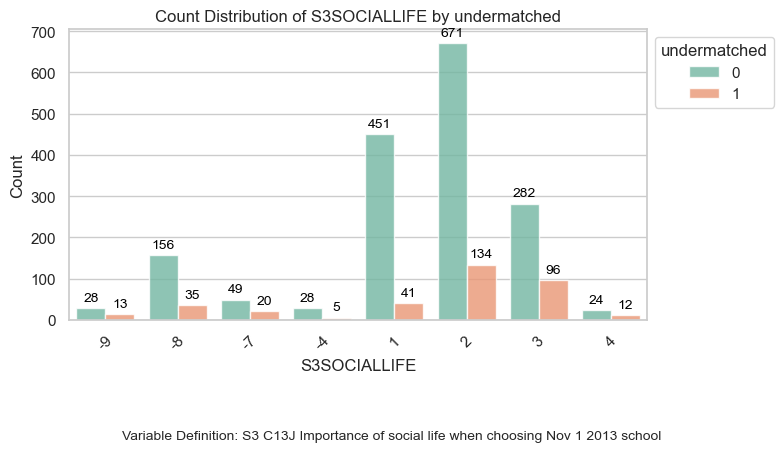

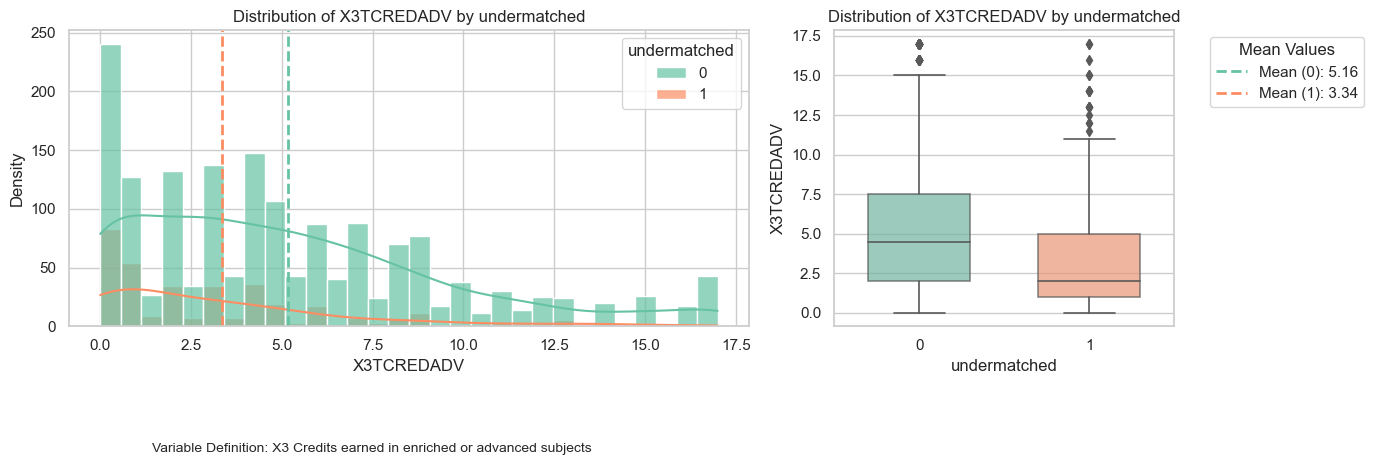

<Figure size 800x400 with 0 Axes>

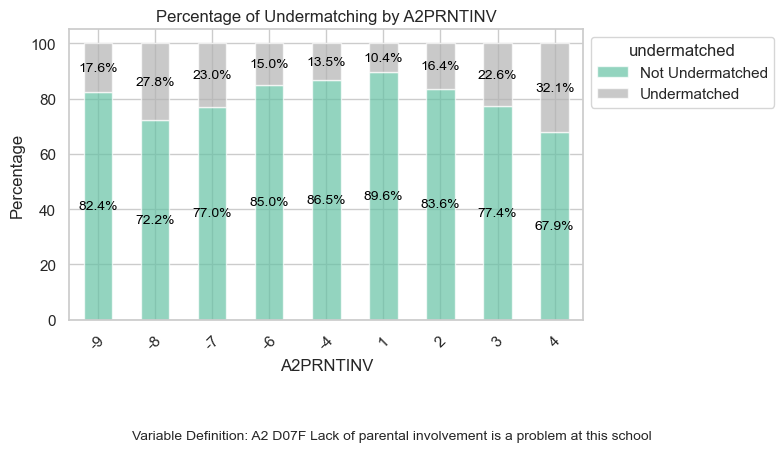

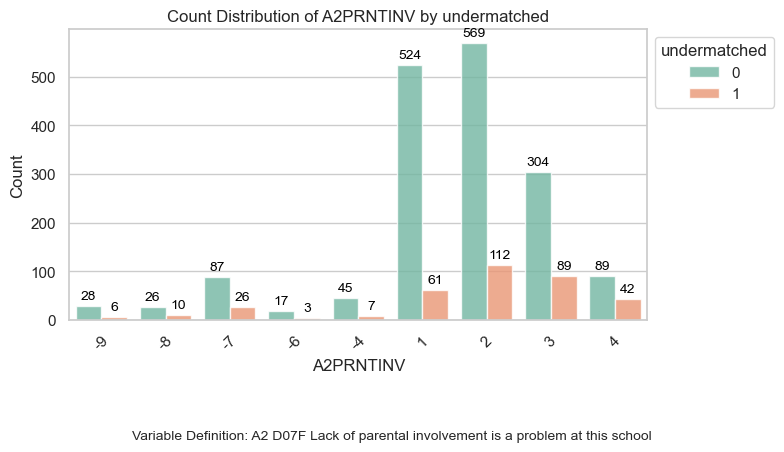

<Figure size 800x400 with 0 Axes>

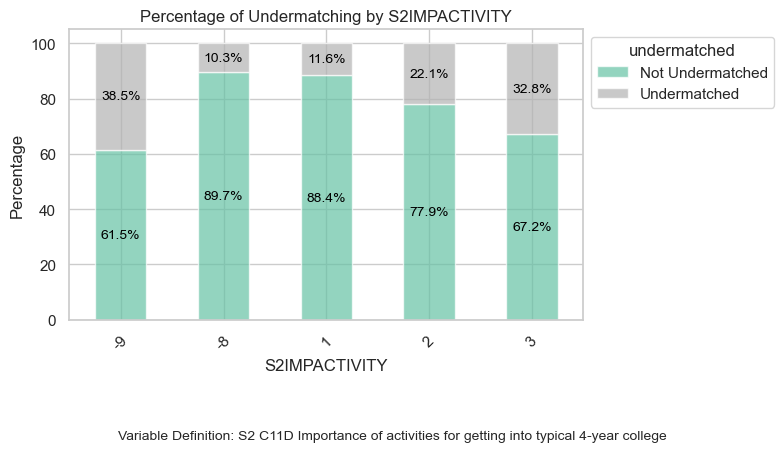

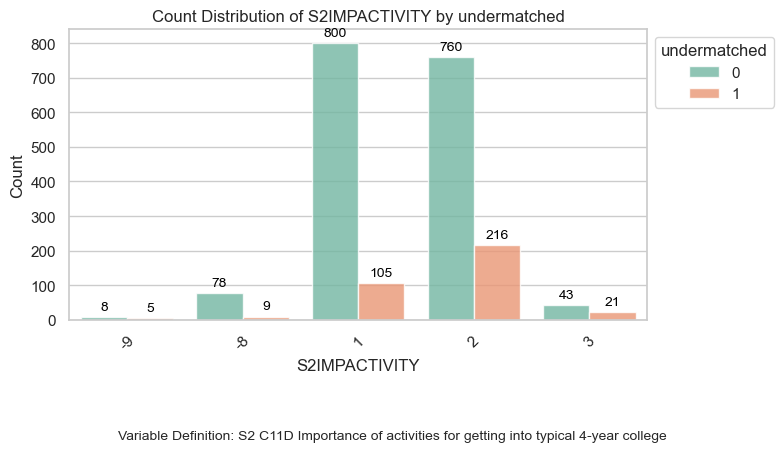

<Figure size 800x400 with 0 Axes>

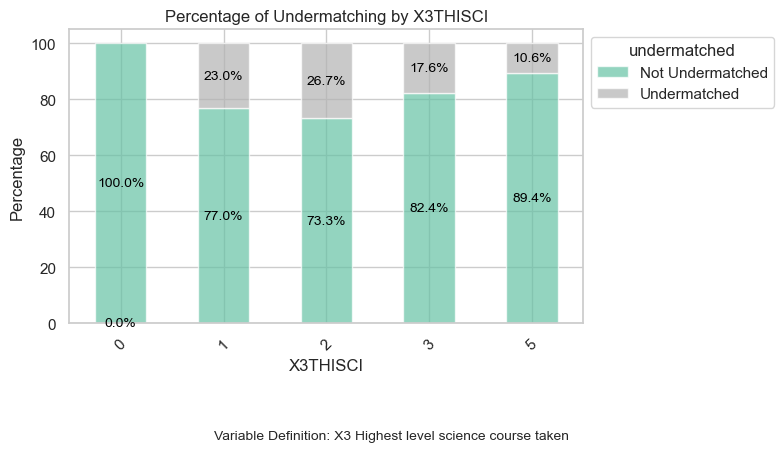

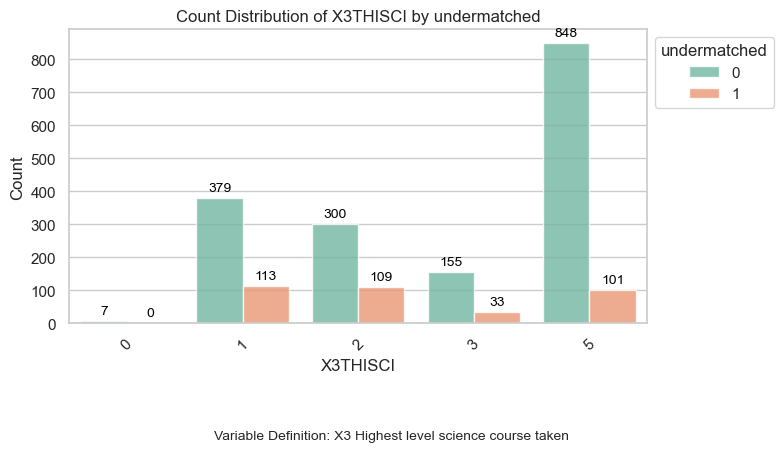

In [342]:


# Create a mapping of variables to definitions
variable_dict = dict(zip(df_variables["Variable"], df_variables["Definition"]))  

# Loop through top selected features
for feature in top_features:
    if feature not in df_chart.columns:
        print(f"Skipping missing feature: {feature}")
        continue  # Skip to the next feature

    # Get variable definition (if available)
    variable_definition = variable_dict.get(feature, "Definition not available")

    # **Categorical Features: Percentage Chart + Count Chart**
    if df_chart[feature].dtype == 'object' or df_chart[feature].nunique() < 10:
        # **Calculate undermatching percentage for each category**
        category_counts = df_chart.groupby(feature)[target_column].value_counts(normalize=True).unstack() * 100
        category_counts = category_counts.rename(columns={0: 'Not Undermatched', 1: 'Undermatched'})  # Rename target labels

        # **Plot stacked bar chart (Percentage)**
        plt.figure(figsize=(8, 4))
        ax = category_counts.plot(kind='bar', stacked=True, colormap='Set2', alpha=0.7, figsize=(8, 4))

        # **Add percentage labels inside bars**
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black')

        # **Set titles and labels**
        plt.ylabel('Percentage')
        plt.xlabel(feature)
        plt.xticks(rotation=45)
        plt.title(f'Percentage of Undermatching by {feature}')

        # **Move legend outside the chart**
        plt.legend(title=target_column, loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

        # **Add footnote for variable definition**
        plt.figtext(0.5, -0.12, f"Variable Definition: {variable_definition}", wrap=True, ha="center", fontsize=10)

        # Show percentage chart
        plt.tight_layout()
        plt.show()

        # **Second Chart: Count Distribution**
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(data=df_chart, x=feature, hue=target_column, palette='Set2', alpha=0.8)

        # **Add count labels on bars**
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', fontsize=10, color='black', padding=3)

        # **Set titles and labels**
        plt.ylabel('Count')
        plt.xlabel(feature)
        plt.xticks(rotation=45)
        plt.title(f'Count Distribution of {feature} by {target_column}')

        # **Move legend outside the chart**
        plt.legend(title=target_column, loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

        # **Add footnote for variable definition**
        plt.figtext(0.5, -0.12, f"Variable Definition: {variable_definition}", wrap=True, ha="center", fontsize=10)

        # Show count distribution chart
        plt.tight_layout()
        plt.show()

    # **Numerical Features: Histogram + Boxplot**
    else:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]})

        # **Histogram with KDE**
        ax1 = sns.histplot(data=df_chart, x=feature, hue=target_column, kde=True, bins=30, palette='Set2', alpha=0.7, ax=axes[0])
        axes[0].set_ylabel('Density')
        axes[0].set_title(f'Distribution of {feature} by {target_column}')
        axes[0].set_xlabel(feature)

        # **Compute means for each target category**
        mean_values = df_chart.groupby(target_column)[feature].mean().reset_index()

        # **Boxplot with transparency**
        ax2 = sns.boxplot(data=df_chart, x=target_column, y=feature, palette='Set2', ax=axes[1], width=0.6, linewidth=1.2, boxprops=dict(alpha=0.7))
        axes[1].set_title(f'Distribution of {feature} by {target_column}')
        axes[1].set_xlabel(target_column)
        axes[1].set_ylabel(feature)

        # **Ensure color consistency between boxplot and histogram**
        colors = sns.color_palette('Set2', n_colors=len(mean_values))

        # **Show mean values as dashed lines on the histogram**
        for target_value, mean_val, color in zip(mean_values[target_column], mean_values[feature], colors):
            axes[0].axvline(mean_val, linestyle='dashed', linewidth=2, color=color)

        # **Show mean values in an external legend (Only for Boxplot)**
        mean_legend_handles = [plt.Line2D([0], [0], color=colors[i], linestyle='dashed', linewidth=2, 
                                          label=f'Mean ({mean_values.iloc[i, 0]}): {mean_values.iloc[i, 1]:.2f}')
                               for i in range(len(mean_values))]

        # **Move mean values legend outside the boxplot**
        if mean_legend_handles:
            fig.legend(handles=mean_legend_handles, title='Mean Values', loc='center right', bbox_to_anchor=(1.15, 0.8), frameon=True)

        # **Histogram legend (Target Class) - No Mean Values**
        handles, labels = axes[0].get_legend_handles_labels()
        if labels:
            axes[0].legend(handles=handles, labels=labels, title=target_column, loc='upper right', frameon=True)

        # **Add footnote for variable definition (Centered below both charts)**
        plt.figtext(0.5, -0.15, f"Variable Definition: {variable_definition}", wrap=True, ha="right", fontsize=10)

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

# Model

## Model Iterations

In [343]:
# Algorithms - Hyperparameters Iterations 

from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier

models = {
    # LOGISTIC REGRESSION
    'LogReg_Default': {
        'model': LogisticRegression(max_iter=500, random_state=42),
        'group': 'Logistic Regression'
    },
    'LogReg_Balanced': {
        'model': LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
        'group': 'Logistic Regression'
    },
    'LogReg_L1': {
        'model': LogisticRegression(max_iter=500, penalty='l1', solver='saga', random_state=42),
        'group': 'Logistic Regression'
    },
    
    # DECISION TREE
    'DT_Default': {
        'model': CalibratedClassifierCV(DecisionTreeClassifier(random_state=42), method='isotonic', cv=5),
        'group': 'Decision Tree'
    },
    'DT_Depth5': {
        'model': DecisionTreeClassifier(max_depth=5, random_state=42),
        'group': 'Decision Tree'
    },
    'DT_Depth5_MinSamplesLeaf5': {
        'model': DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42),
        'group': 'Decision Tree'
    },
    
    # RANDOM FOREST
    'RF_Default': {
        'model': RandomForestClassifier(random_state=42),
        'group': 'Random Forest'
    },
    'RF_300Trees': {
        'model': RandomForestClassifier(n_estimators=300, random_state=42),
        'group': 'Random Forest'
    },
    'RF_Depth3': {
        'model': RandomForestClassifier(max_depth=3, random_state=42),
        'group': 'Random Forest'
    },
    'RF_Depth4': {
        'model': RandomForestClassifier(max_depth=4, random_state=42),
        'group': 'Random Forest'
    },
    'RF_Depth5': {
        'model': RandomForestClassifier(max_depth=5, random_state=42),
        'group': 'Random Forest'
    },

    # EXTRA TREES
    'ET_Default': {
        'model': ExtraTreesClassifier(random_state=42),
        'group': 'Extra Trees'
    },
    'ET_300Trees': {
        'model': ExtraTreesClassifier(n_estimators=300, random_state=42),
        'group': 'Extra Trees'
    },

    # GRADIENT BOOSTING
    'GB_Default': {
        'model': GradientBoostingClassifier(random_state=42),
        'group': 'Gradient Boosting'
    },
    'GB_LR0.05': {
        'model': GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, random_state=42),
        'group': 'Gradient Boosting'
    },

    # ADABOOST
    'Ada_Default': {
        'model': AdaBoostClassifier(random_state=42),
        'group': 'AdaBoost'
    },
    'Ada_LR0.5': {
        'model': AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42),
        'group': 'AdaBoost'
    },
    
    # XGBOOST
    'XGB_Default': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'group': 'XGBoost'
    },
    'XGB_LR0.05': {
        'model': XGBClassifier(
            use_label_encoder=False, eval_metric='logloss',
            learning_rate=0.05, n_estimators=200, random_state=42
        ),
        'group': 'XGBoost'
    },
    
    # LIGHTGBM
    'LGBM_Default': {
        'model': LGBMClassifier(random_state=42, verbose=-1),
        'group': 'LightGBM'
    },
    'LGBM_MoreLeaves': {
        'model': LGBMClassifier(num_leaves=63, random_state=42, verbose=-1),
        'group': 'LightGBM'
    },
    
    # SVM
 #   'SVM_Default': {
 #       'model': SVC(kernel='rbf', probability=True, random_state=42),
 #       'group': 'SVM'
 #    },
 #   'SVM_C10_Gamma0.01': {
 #       'model': SVC(kernel='rbf', C=10, gamma=0.01, probability=True, random_state=42),
 #       'group': 'SVM'
 #   },
    
    # NEURAL NETWORK (MLP)
    'MLP_Default': {
        'model': MLPClassifier(max_iter=500, random_state=42),
        'group': 'Neural Network (MLP)'
    },
    'MLP_2Layer': {
        'model': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
        'group': 'Neural Network (MLP)'
    }
}



In [344]:
# Number of Features Iterations

top_n_values = range(1, 16, 1)  # e.g., 5, 10, 15, 20, 25

In [345]:
# Probability Threshold Iterations

thresholds = [round(x, 2) for x in np.arange(0.05, 0.51, 0.05)]

## Model Training & Evaluation 

In [346]:
# Iterate over models, top_n features and probability thresholds

performance_records = []

for top_n in top_n_values:
    # Select the top n features by importance
    selected_features = feature_importance_df.head(top_n)['feature'].values
    X_selected_n = X[selected_features]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected_n, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    
    for model_key, model_info in models.items():
        group_name = model_info['group']
        estimator = model_info['model']
        
        estimator.fit(X_train, y_train)
        
        # If model supports probabilities
        if hasattr(estimator, "predict_proba"):
            y_proba = estimator.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
            
            for th in thresholds:
                y_pred_th = (y_proba >= th).astype(int)
                
                # Compute confusion-matrix-based metrics
                accuracy = accuracy_score(y_test, y_pred_th)
                precision = precision_score(y_test, y_pred_th, zero_division=0)
                recall = recall_score(y_test, y_pred_th, zero_division=0)
                f2 = fbeta_score(y_test, y_pred_th, beta=2, zero_division=0)
                
                tn, fp, fn, tp = confusion_matrix(y_test, y_pred_th).ravel()

                specificity = tn / (tn + fp) if (tn + fp) else np.nan
                npv = tn / (tn + fn) if (tn + fn) else np.nan
                pct_pred_positive = (y_pred_th.sum() / len(y_pred_th)) * 100

                performance_records.append({
                    'Group': group_name,
                    'Model': model_key,
                    'Top_N': top_n,
                    'Threshold': th,
                    'F2-Score': f2,
                    'Recall': recall,
                    'Precision': precision,
                    'Specificity': specificity,
                    'NPV': npv,
                    'Accuracy': accuracy,       # <--- Added here (before AUC)
                    'AUC': auc,
                    'Pct_Pred_Positive': pct_pred_positive
                })
        else:
            # If no predict_proba
            performance_records.append({
                'Group': group_name,
                'Model': model_key,
                'Top_N': top_n,
                'Threshold': np.nan,
                'F2-Score': np.nan,
                'Recall': np.nan,
                'Precision': np.nan,
                'Specificity': np.nan,
                'NPV': np.nan,
                'Accuracy': np.nan,
                'AUC': np.nan,
                'Pct_Pred_Positive': np.nan
            })

# Convert to DataFrame
results_df = pd.DataFrame(performance_records)

# Reorder columns: now Accuracy appears before AUC
col_order = [
    'Group', 'Model', 'Top_N', 'Threshold',
    'F2-Score', 'Recall', 'Precision', 'Specificity', 'NPV',
    'Accuracy', 'AUC', 'Pct_Pred_Positive'
]


/Users/andrerincon/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:58:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andrerincon/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:58:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andrerincon/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:59:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/andrerincon/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:59:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warni

## All Models Performance Results

In [347]:
# Convert to DataFrame
results_df = pd.DataFrame(performance_records)

# Sort by F2-Score 
results_df_sorted = results_df.sort_values(by='F2-Score', ascending=False)

# Reorder columns
col_order = [
    'Group',
    'Model',
    'Top_N',
    'Threshold',
    'F2-Score',
    'Recall',
    'Precision',
    'Specificity',
    'NPV',
    'Accuracy',
    'AUC',
    'Pct_Pred_Positive'
]
results_df_sorted = results_df_sorted[col_order]

# Round numeric columns
for metric in ["F2-Score", "Recall", "Precision","Specificity", "Accuracy","NPV", "AUC","Pct_Pred_Positive"]:
    results_df_sorted[metric] = results_df_sorted[metric].round(4)

display(results_df_sorted)

,Group,Model,Top_N,Threshold,F2-Score,Recall,Precision,Specificity,NPV,Accuracy,AUC,Pct_Pred_Positive
3022,Decision Tree,DT_Default,14,0.15,0.6028,0.8592,0.2748,0.5237,0.9465,0.5819,0.7047,54.2787
2881,Extra Trees,ET_300Trees,13,0.10,0.5981,0.9014,0.2550,0.4467,0.9557,0.5257,0.7173,61.3692
2651,Extra Trees,ET_300Trees,12,0.10,0.5932,0.8873,0.2551,0.4556,0.9506,0.5306,0.7111,60.3912
2831,Random Forest,RF_300Trees,13,0.10,0.5910,0.8873,0.2530,0.4497,0.9500,0.5257,0.7134,60.8802
2151,Random Forest,RF_Depth3,10,0.10,0.5893,0.9577,0.2321,0.3343,0.9741,0.4425,0.7001,71.6381
...,...,...,...,...,...,...,...,...,...,...,...,...
1418,Decision Tree,DT_Default,7,0.45,0.0000,0.0000,0.0000,1.0000,0.8264,0.8264,0.6223,0.0000
109,Random Forest,RF_Depth5,1,0.50,0.0000,0.0000,0.0000,1.0000,0.8264,0.8264,0.5671,0.0000
108,Random Forest,RF_Depth5,1,0.45,0.0000,0.0000,0.0000,1.0000,0.8264,0.8264,0.5671,0.0000
107,Random Forest,RF_Depth5,1,0.40,0.0000,0.0000,0.0000,1.0000,0.8264,0.8264,0.5671,0.0000


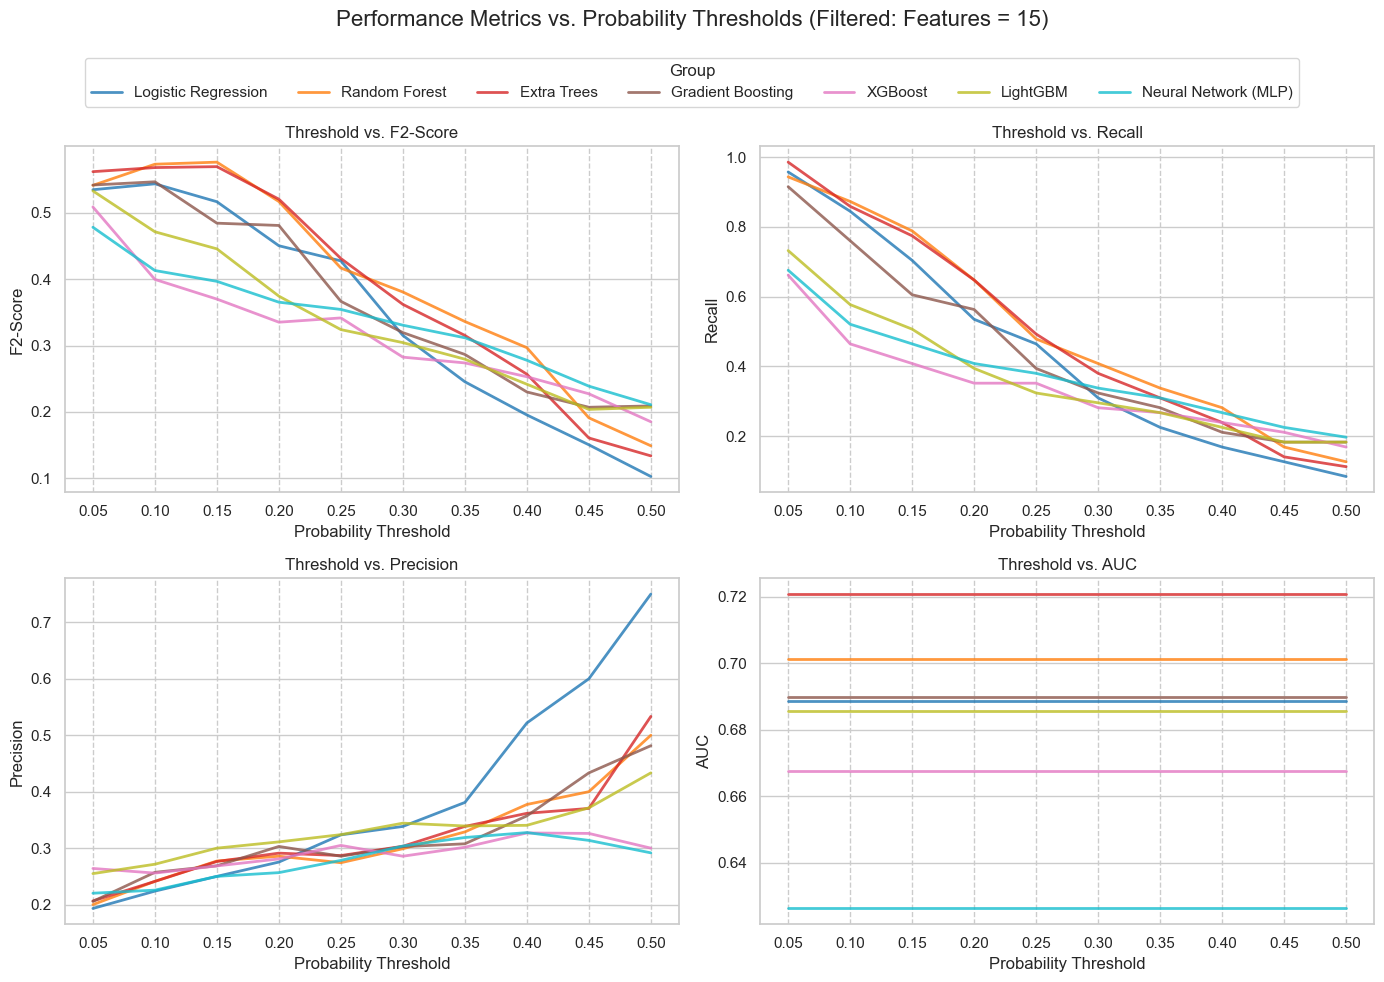

In [348]:

# Define x-ticks for thresholds
xticks = np.arange(0.05, 0.51, 0.05)

# Filter results for Features = 15
filtered_results = results_df[results_df['Top_N'] == 15]
# Filter Model that contain 'Default' in their name
filtered_results = filtered_results[filtered_results['Model'].str.contains('Default')]
#filter out ADABOOST and Decision Tree
filtered_results = filtered_results[~filtered_results['Group'].isin(['AdaBoost', 'Decision Tree'])]

# Get the unique groups 
unique_groups = filtered_results['Group'].unique()
group_to_idx = {group: idx for idx, group in enumerate(unique_groups)}
cmap = plt.cm.get_cmap("tab10", len(unique_groups))

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # flatten for easy indexing

# Define metrics to plot
metrics = ['F2-Score', 'Recall', 'Precision', 'AUC']
titles = ['Threshold vs. F2-Score', 'Threshold vs. Recall', 'Threshold vs. Precision', 'Threshold vs. AUC']
y_labels = ['F2-Score', 'Recall', 'Precision', 'AUC']

# Loop through metrics and create line plots
for idx, metric in enumerate(metrics):
    ax = axs[idx]
    
    for group in unique_groups:
        df_temp = filtered_results[filtered_results['Group'] == group].sort_values(by='Threshold')
        
        ax.plot(df_temp['Threshold'], df_temp[metric], 
                color=cmap(group_to_idx[group]), 
                alpha=0.8, 
                linewidth=2, 
                label=group)
    
    ax.set_xlabel('Probability Threshold')
    ax.set_ylabel(y_labels[idx])
    ax.set_title(titles[idx])
    ax.set_xticks(xticks)
    ax.grid(axis='x', linestyle='--')

# Title
fig.suptitle("Performance Metrics vs. Probability Thresholds (Filtered: Features = 15)", fontsize=16, y=0.98)

# Legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Group', loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=len(unique_groups))

# Spacing
plt.tight_layout(rect=[0, 0, 1, 0.92])

plt.show()

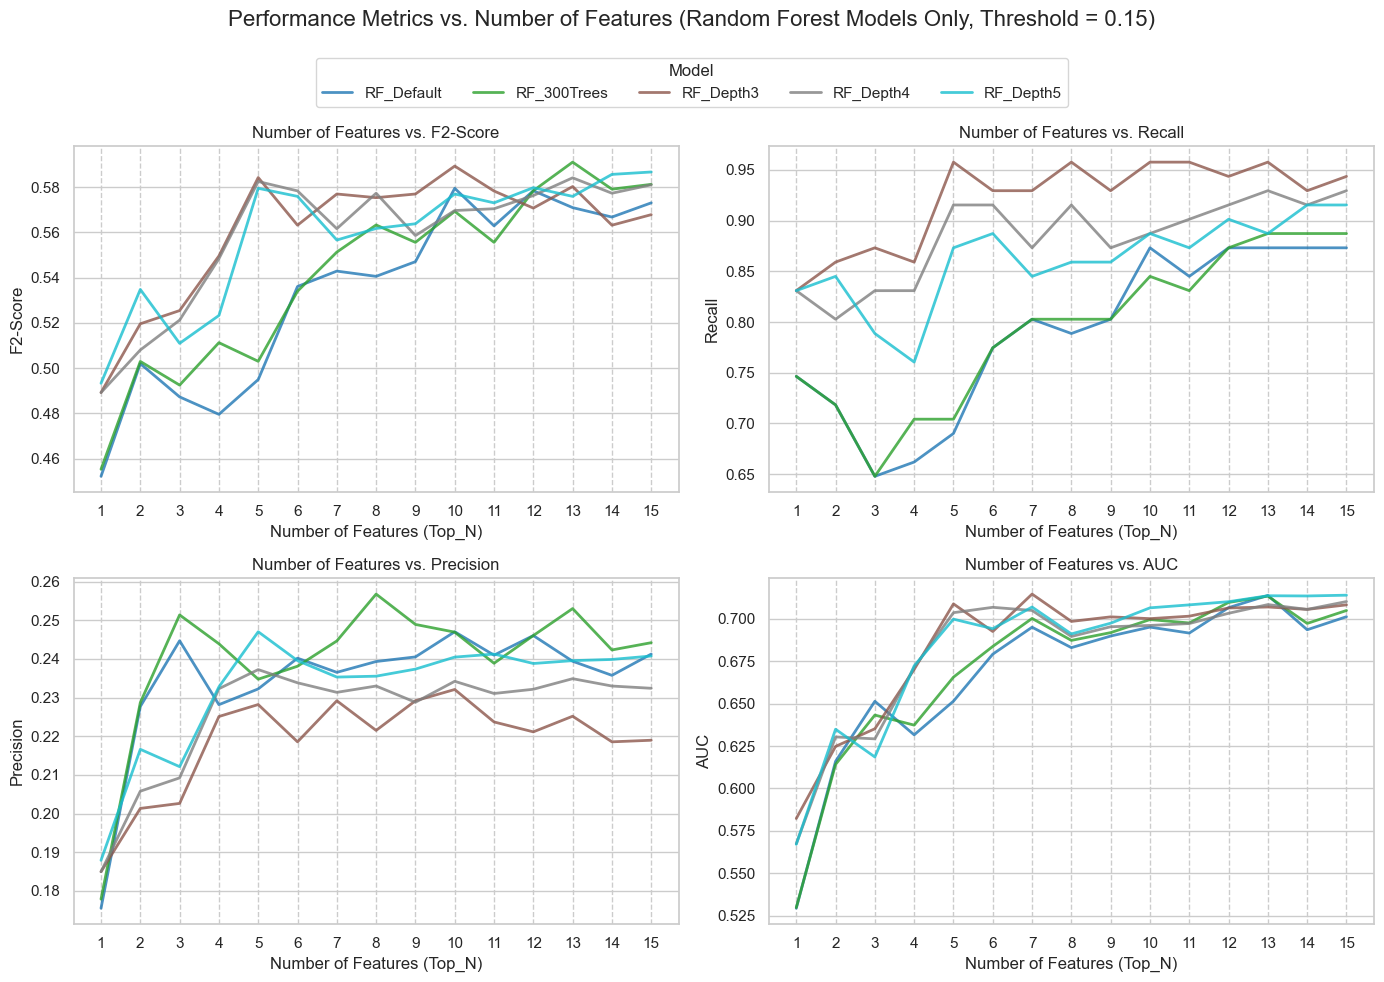

In [356]:
# Define x-ticks for the number of features
xticks = np.arange(1, 16, 1)

# Filter results to only show Random Forest models and threshold = 0.10
filtered_results = results_df[(results_df['Group'] == 'Random Forest') & (results_df['Threshold'] == 0.10)]

# Get the unique models within the Random Forest group
unique_models = filtered_results['Model'].unique()
model_to_idx = {model: idx for idx, model in enumerate(unique_models)}
cmap = plt.cm.get_cmap("tab10", len(unique_models))

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # Flatten for easy indexing

# Define metrics to plot
metrics = ['F2-Score', 'Recall', 'Precision', 'AUC']
titles = ['Number of Features vs. F2-Score', 'Number of Features vs. Recall', 
          'Number of Features vs. Precision', 'Number of Features vs. AUC']
y_labels = ['F2-Score', 'Recall', 'Precision', 'AUC']

# Loop through metrics and create line plots segmented by Model
for idx, metric in enumerate(metrics):
    ax = axs[idx]

    for model in unique_models:
        df_temp = filtered_results[filtered_results['Model'] == model].sort_values(by='Top_N')

        ax.plot(df_temp['Top_N'], df_temp[metric], 
                color=cmap(model_to_idx[model]), 
                alpha=0.8, 
                linewidth=2, 
                label=model)

    ax.set_xlabel('Number of Features (Top_N)')
    ax.set_ylabel(y_labels[idx])
    ax.set_title(titles[idx])
    ax.set_xticks(xticks)
    ax.grid(axis='x', linestyle='--')

# Title
fig.suptitle("Performance Metrics vs. Number of Features (Random Forest Models Only, Threshold = 0.15)", fontsize=16, y=0.98)

# Legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Model', loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=len(unique_models))

# Spacing
plt.tight_layout(rect=[0, 0, 1, 0.92])

# Display the plots
plt.show()

## Best Models Performance Results

In [353]:
# filter for the best models

best_models = results_df_sorted[
    (results_df_sorted['F2-Score'] >= 0.5) &
    (results_df_sorted['Recall'] >= 0.8) &
    (results_df_sorted['Precision'] >= 0.2) &
    (results_df_sorted['AUC'] >= 0.7)
]
display(best_models)


,Group,Model,Top_N,Threshold,F2-Score,Recall,Precision,Specificity,NPV,Accuracy,AUC,Pct_Pred_Positive
3022,Decision Tree,DT_Default,14,0.15,0.6028,0.8592,0.2748,0.5237,0.9465,0.5819,0.7047,54.2787
2881,Extra Trees,ET_300Trees,13,0.10,0.5981,0.9014,0.2550,0.4467,0.9557,0.5257,0.7173,61.3692
2651,Extra Trees,ET_300Trees,12,0.10,0.5932,0.8873,0.2551,0.4556,0.9506,0.5306,0.7111,60.3912
2831,Random Forest,RF_300Trees,13,0.10,0.5910,0.8873,0.2530,0.4497,0.9500,0.5257,0.7134,60.8802
2151,Random Forest,RF_Depth3,10,0.10,0.5893,0.9577,0.2321,0.3343,0.9741,0.4425,0.7001,71.6381
...,...,...,...,...,...,...,...,...,...,...,...,...
3340,Extra Trees,ET_300Trees,15,0.05,0.5466,0.9577,0.2012,0.2012,0.9577,0.3325,0.7197,82.6406
2830,Random Forest,RF_300Trees,13,0.05,0.5464,0.9296,0.2062,0.2485,0.9438,0.3667,0.7134,78.2396
3280,Random Forest,RF_Default,15,0.05,0.5412,0.9437,0.2000,0.2071,0.9459,0.3350,0.7012,81.9071
1500,Extra Trees,ET_300Trees,7,0.05,0.5394,0.8873,0.2100,0.2988,0.9266,0.4010,0.7156,73.3496


## Model Insights

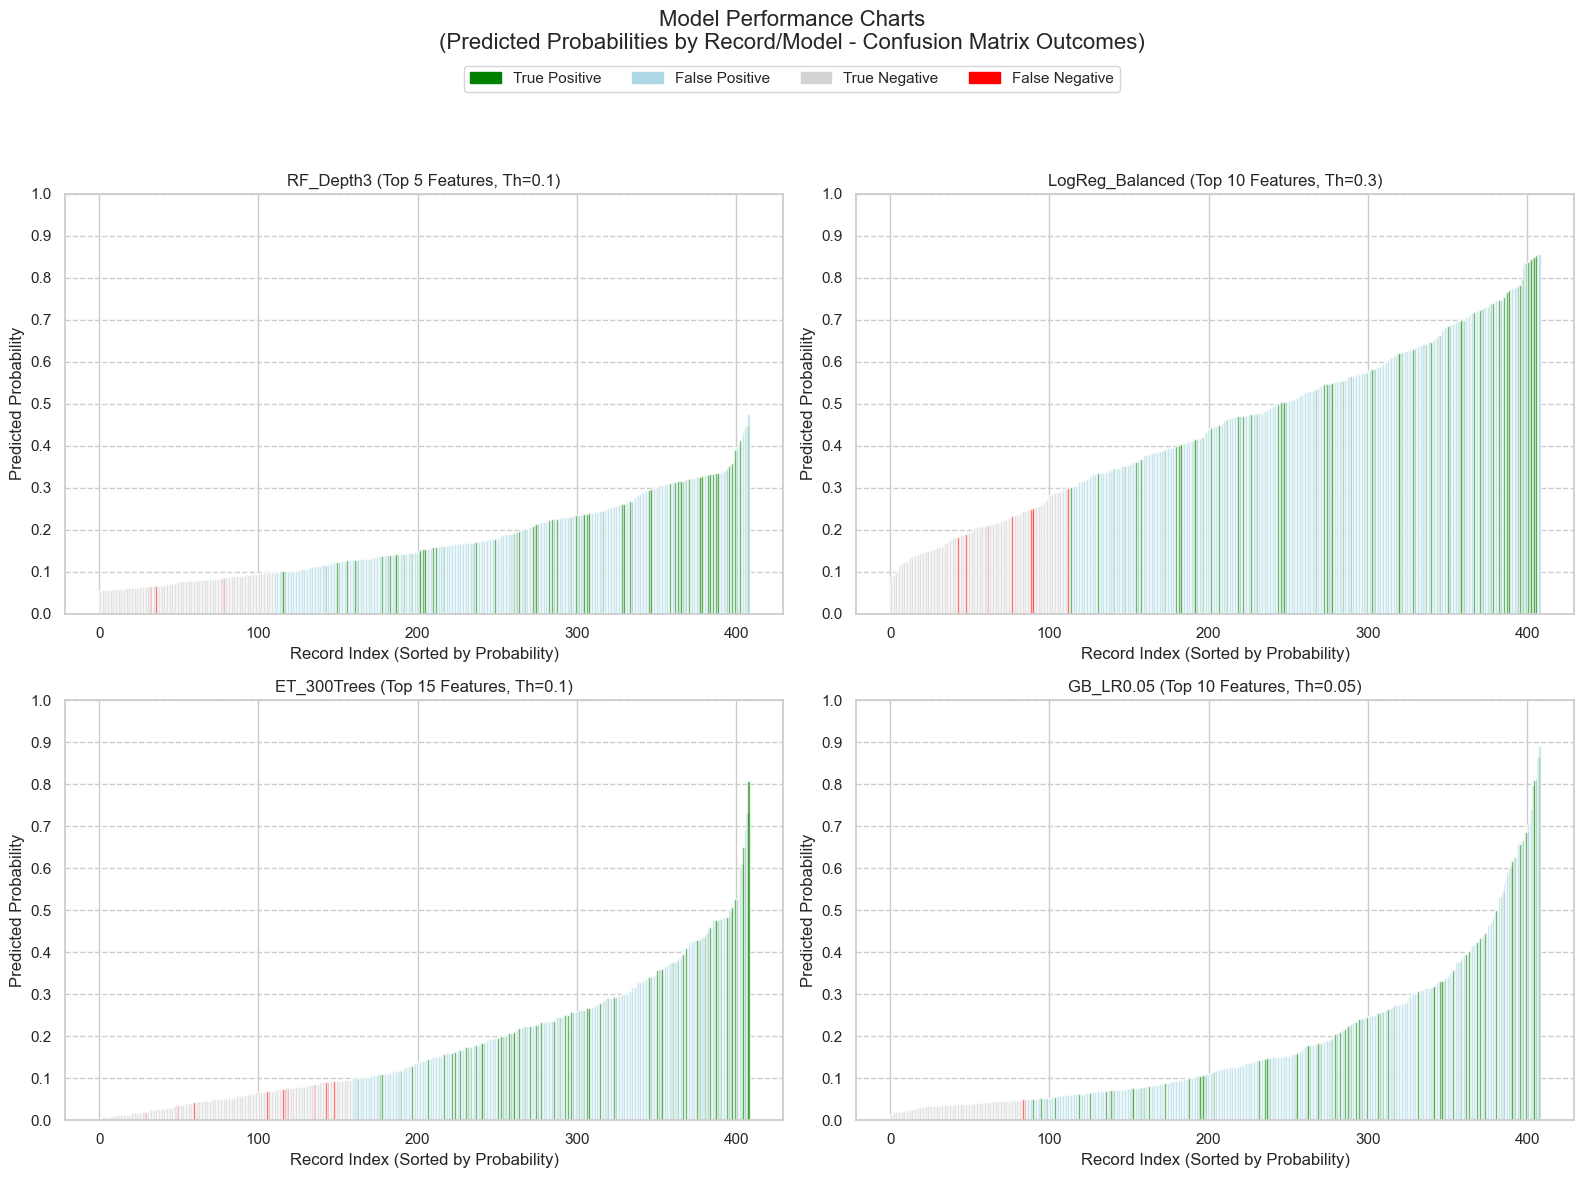

In [351]:
# Confusion Matrix Colors
def assign_color(row):
    pred = row['Predicted_Label']
    actual = row['Actual_Label']
    if pred == 1 and actual == 1:
        return 'green'   # True Positive
    elif pred == 1 and actual == 0:
        return 'lightblue'    # False Positive
    elif pred == 0 and actual == 0:
        return 'lightgray'    # True Negative
    else:
        return 'red'     # False Negative

# Results
def get_results_df(model_key, top_n, threshold):
    # Select the top_n features based on feature importance
    selected_features = feature_importance_df.head(top_n)['feature'].values
    X_selected = X[selected_features]
    
    # (Re)split data using local split for each configuration
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    
    # Model Info
    model_info = models[model_key]
    estimator = model_info['model']
    
    # Train the model
    estimator.fit(X_train, y_train)
    
    # Predict probabilities and apply threshold
    y_proba = estimator.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    
    # Results DataFrame
    df = pd.DataFrame({
        'Test_Index': X_test.index,
        'Probability': np.round(y_proba, 4),
        'Predicted_Label': y_pred,
        'Actual_Label': y_test
    })
    
    # Sort by predicted probability
    df = df.sort_values(by='Probability').reset_index(drop=True)
    
    # Assign colors based on confusion outcome
    df['Color'] = df.apply(assign_color, axis=1)
    
    return df

# Model Configurations
configs = [
    {"model_key": "RF_Depth3", "top_n": 5,  "threshold": 0.1,  "title": "RF_Depth3 (Top 5 Features, Th=0.1)"},
    {"model_key": "LogReg_Balanced", "top_n": 10, "threshold": 0.3,  "title": "LogReg_Balanced (Top 10 Features, Th=0.3)"},
    {"model_key": "ET_300Trees", "top_n": 15, "threshold": 0.1,  "title": "ET_300Trees (Top 15 Features, Th=0.1)"},
    {"model_key": "GB_LR0.05", "top_n": 10, "threshold": 0.05, "title": "GB_LR0.05 (Top 10 Features, Th=0.05)"}
]

# Grid
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

# Plot each configuration's bar chart
for i, config in enumerate(configs):
    df = get_results_df(config["model_key"], config["top_n"], config["threshold"])
    
    axs[i].bar(x=df.index, height=df['Probability'], color=df['Color'], alpha=0.7, width=2)
    axs[i].set_title(config["title"])
    axs[i].set_xlabel('Record Index (Sorted by Probability)')
    axs[i].set_ylabel('Predicted Probability')
    axs[i].set_ylim(0, 1)
    # Set y-ticks at every 0.1 increment and add gridlines
    axs[i].set_yticks(np.arange(0, 1.1, 0.1))
    axs[i].grid(axis='y', linestyle='--')

# Legend
legend_handles = [
    mpatches.Patch(color='green', label='True Positive'),
    mpatches.Patch(color='lightblue', label='False Positive'),
    mpatches.Patch(color='lightgray', label='True Negative'),
    mpatches.Patch(color='red', label='False Negative')
]
fig.legend(handles=legend_handles, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 0.94))

# Title
fig.suptitle("Model Performance Charts\n(Predicted Probabilities by Record/Model - Confusion Matrix Outcomes)", fontsize=16, y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.91])
plt.show()

# Deployment

In [358]:
# Define specific parameters
top_n_value = 7  # Only use top 7 features
threshold_value = 0.10  # Use threshold 0.1
selected_model_key = 'RF_Depth3'  # Specify the model to run

# Select the top n features by importance
selected_features = feature_importance_df.head(top_n_value)['feature'].values
X_selected_n = X[selected_features]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_n, y, test_size=0.2, random_state=42, stratify=y
)

# Get model details
model_info = models[selected_model_key]
group_name = model_info['group']
estimator = model_info['model']

# Train the selected model
estimator.fit(X_train, y_train)

# summarize the model results
print(f"Model: {selected_model_key}")
print(f"Group: {group_name}")
print(f"Top N Features: {top_n_value}")
print(f"Threshold: {threshold_value}")
print(f"Selected Features: {selected_features}")
print(f"Model Coefficients: {estimator.coef_ if hasattr(estimator, 'coef_') else 'N/A'}")
print(f"Model Intercept: {estimator.intercept_ if hasattr(estimator, 'intercept_') else 'N/A'}")
# Predict probabilities
y_proba = estimator.predict_proba(X_test)[:, 1]
# Apply threshold to get predicted labels
y_pred = (y_proba >= threshold_value).astype(int)
# Calculate and print classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Calculate F2 Score (β = 2 means recall is weighted more than precision)
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score: {f2:.4f}")

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Save the trained model to a file joblib
model_filename = f"{selected_model_key}_top{top_n_value}_th{threshold_value}.joblib"
joblib.dump(estimator, model_filename)
print(f"Model saved to {model_filename}")

Model: RF_Depth3
Group: Random Forest
Top N Features: 7
Threshold: 0.1
Selected Features: ['A2HIGHERED' 'X3THILANG' 'X3TCREDGEN' 'X3THIMATH' 'S3REPUTATION'
 'S2FR2YPUB' 'X3TCREDAPIB']
Model Coefficients: N/A
Model Intercept: N/A
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.34      0.51       338
           1       0.23      0.93      0.37        71

    accuracy                           0.44       409
   macro avg       0.59      0.64      0.44       409
weighted avg       0.83      0.44      0.48       409

F2 Score: 0.5769
AUC: 0.7146
Confusion Matrix:
[[116 222]
 [  5  66]]
Model saved to RF_Depth3_top7_th0.1.joblib
